In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import numpy as np

C2 = np.array([
    [1.7, -1, 6.4, 3.7],
    [4.8, 5, 2, 6.1]
])

C3 = np.array([
    [1.7, 5.3],
    [3.4, 7.9],
    [8.6, 3.1],
    [2.8, 7.5],
    [9.3, 4.5]
])

C4 = np.array([
    [2, 2, -5],
    [1, -6, 9],
    [-4, 4, -11]
])

A = np.array([
    [3, 2],
    [1, 4]
])

B = np.array([
    [2, 0],
    [2, 6]
])


=== Решение задачи 1: Матричная игра 2 × N ===
Матрица C2:
[[ 1.7 -1.   6.4]
 [ 4.8  5.   2. ]]


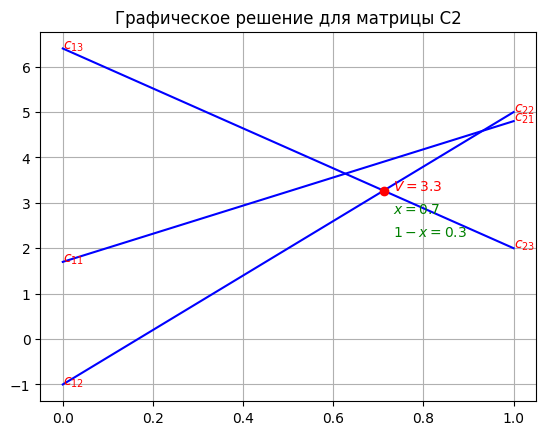

Вероятности для первого игрока: p1 = 0.2885, p2 = 0.7115
Значение игры: V = 3.26923077
Вероятность для второго игрока: q1 = 0.4231

=== Решение задачи 2: Матричная игра M × 2 ===
Матрица C3:
[[3.4 7.9]
 [9.3 4.5]]


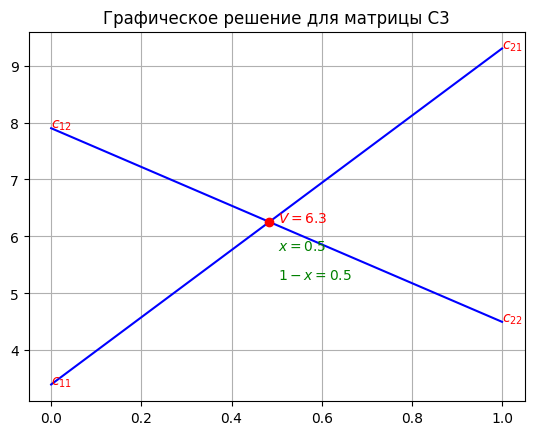

Вероятность для второго игрока: q1 = 0.3656

=== Решение задачи 3: Матричная игра M × N ===
Матрица C4:
[[13 13  6]
 [12  5 20]
 [ 7 15  0]]
Решение для первого игрока:
Значение игры: V = -0.5455
Вероятности: p = [0.68181818 0.31818182 0.        ]

Решение для второго игрока:
Значение игры: V = -0.5455
Вероятности: q = [0.         0.63636364 0.36363636]
=== Решение задачи 4: Биматричная игра ===
Матрица A:
[[3 2]
 [1 4]]
Матрица B:
[[2 0]
 [2 6]]


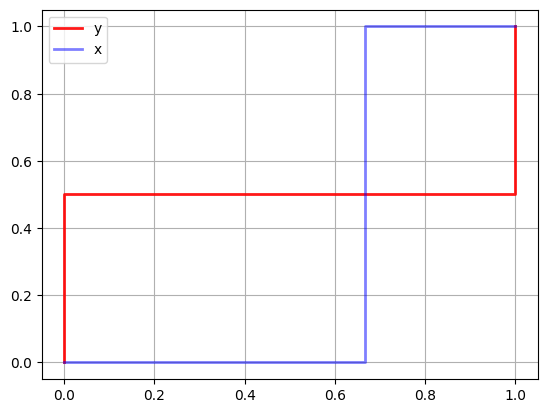

=== Решение задачи 5: Матричная игра 2 × 2 ===


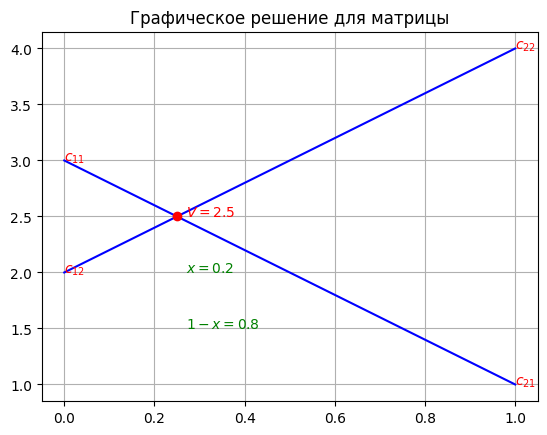

Вероятности для первого игрока: p1 = 0.7500, p2 = 0.2500
Вероятность для второго игрока: q1 = 0.5000

Значение игры: V = 2.50000000
=== Решение задачи 5: Матричная игра 2 × 2 ===


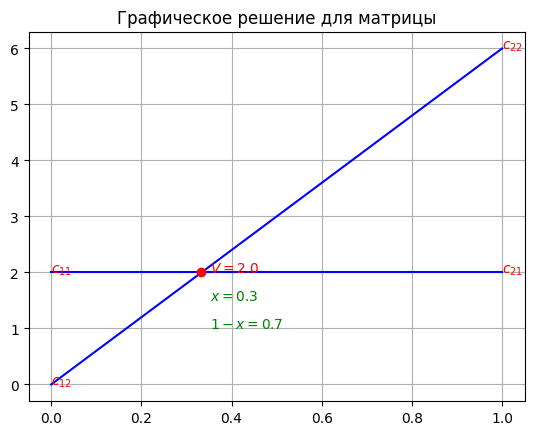

Вероятности для первого игрока: p1 = 0.6667, p2 = 0.3333
Вероятность для второго игрока: q1 = 1.0000

Значение игры: V = 2.00000000


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import linprog
import sympy as sym

def solve_task_1():
    print("=== Решение задачи 1: Матричная игра 2 × N ===")
    C2 = np.array([
        [1.7, -1, 6.4],
        [4.8, 5, 2]
    ])
    print("Матрица C2:")
    print(C2)

    lines = []
    c1 = []
    c2 = []

    for i in range(C2.shape[1]):
        c1i = C2[0][i]
        c1.append(c1i)
        c2i = C2[1][i]
        c2.append(c2i)
        plt.plot([0, 1], [c1i, c2i], color='blue')
        plt.text(1, c2i, f'$c_{{2{i+1}}}$', color='red')
        plt.text(0, c1i, f'$c_{{1{i+1}}}$', color='red')
        lines.append({'a': c2i - c1i, 'b': c1i})

    low_intersection = []

    for i in range(len(lines) - 1):
        for j in range(i + 1, len(lines)):
            a1 = lines[i]['a']
            b1 = lines[i]['b']
            a2 = lines[j]['a']
            b2 = lines[j]['b']
            if a1 == a2:
                continue
            x = (b2 - b1) / (a1 - a2)
            y = a1 * x + b1
            if x > 0 and x < 1:
                if not low_intersection or y < low_intersection[1]:
                    low_intersection = (x, y)

    x_inters = low_intersection[0]
    y_inters = low_intersection[1]

    plt.scatter(x_inters, y_inters, color='red', zorder=5)
    plt.text(x_inters + 0.02, y_inters, f'$V={round(y_inters, 1)}$', color='red')
    plt.text(x_inters + 0.02, y_inters - 0.5, f'$x={round(x_inters, 1)}$', color='green')
    plt.text(x_inters + 0.02, y_inters - 1.0, f'$1-x={round(1 - x_inters, 1)}$', color='green')
    plt.title("Графическое решение для матрицы C2")
    plt.grid()
    plt.show()

    j = 1; k = 2
    p1 = (c2[j] - c2[k]) / (c1[k] + c2[j] - (c1[j] + c2[k]))
    p2 = (c1[k] - c1[j]) / (c1[k] + c2[j] - (c1[j] + c2[k]))
    V = (c1[k] * c2[j] - c1[j] * c2[k]) / (c1[k] + c2[j] - (c1[j] + c2[k]))
    print(f"Вероятности для первого игрока: p1 = {p1:.4f}, p2 = {p2:.4f}")
    print(f"Значение игры: V = {V:.8f}")

    q1 = (c2[k] - c1[k]) / (c1[j] + c2[k] - (c1[k] + c2[j]))
    print(f"Вероятность для второго игрока: q1 = {q1:.4f}\n")

def solve_task_2():
    print("=== Решение задачи 2: Матричная игра M × 2 ===")
    C3 = np.array([
        [3.4, 7.9],
        [9.3, 4.5],
    ])
    # C3 = np.array([
    # [1.7, 5.3],
    # [3.4, 7.9],
    # [8.6, 3.1],
    # [2.8, 7.5],
    # [9.3, 4.5]
    # ])
    print("Матрица C3:")
    print(C3)

    lines = []
    c1 = []
    c2 = []

    for i in range(C3.shape[1]):
        c1i = C3[0][i]
        c1.append(c1i)
        c2i = C3[1][i]
        c2.append(c2i)
        plt.plot([0, 1], [c1i, c2i], color='blue')
        plt.text(1, c2i, f'$c_{{2{i+1}}}$', color='red')
        plt.text(0, c1i, f'$c_{{1{i+1}}}$', color='red')
        lines.append({'a': c2i - c1i, 'b': c1i})

    low_intersection = []

    for i in range(len(lines) - 1):
        for j in range(i + 1, len(lines)):
            a1 = lines[i]['a']
            b1 = lines[i]['b']
            a2 = lines[j]['a']
            b2 = lines[j]['b']
            if a1 == a2:
                continue
            x = (b2 - b1) / (a1 - a2)
            y = a1 * x + b1
            if x > 0 and x < 1:
                if not low_intersection or y < low_intersection[1]:
                    low_intersection = (x, y)

    x_inters = low_intersection[0]
    y_inters = low_intersection[1]

    plt.scatter(x_inters, y_inters, color='red', zorder=5)
    plt.text(x_inters + 0.02, y_inters, f'$V={round(y_inters, 1)}$', color='red')
    plt.text(x_inters + 0.02, y_inters - 0.5, f'$x={round(x_inters, 1)}$', color='green')
    plt.text(x_inters + 0.02, y_inters - 1.0, f'$1-x={round(1 - x_inters, 1)}$', color='green')
    plt.title("Графическое решение для матрицы C3")
    plt.grid()
    plt.show()

    j = 0; k = 1
    q1 = (C3[j][1] - C3[k][1]) / (C3[k][0] + C3[j][1] - (C3[k][1] + C3[j][0]))
    print(f"Вероятность для второго игрока: q1 = {q1:.4f}\n")

def solve_task_3():
    print("=== Решение задачи 3: Матричная игра M × N ===")
    C4 = np.array([
        [2, 2, -5],
        [1, -6, 9],
        [-4, 4, -11]
    ])+11
    print("Матрица C4:")
    print(C4)
    c = [1, 1, 1] 
    A_ub = -C4.T   
    b_ub = [-1, -1, -1]  

    res = linprog(c, A_ub=A_ub, b_ub=b_ub, method='highs')

    if res.success:
        Z = res.fun 
        V = 1 / Z   
        p = res.x * V 
        print(f"Решение для первого игрока:")
        print(f"Значение игры: V = {V-11:.4f}")
        print(f"Вероятности: p = {p}")
    else:
        print("Решение для первого игрока не найдено.")

    c = [-1, -1, -1]  
    A_ub = C4         
    b_ub = [1, 1, 1]  

    res = linprog(c, A_ub=A_ub, b_ub=b_ub, method='highs')

    if res.success:
        Z = -res.fun  
        V = 1 / Z 
        q = res.x * V 
        print(f"\nРешение для второго игрока:")
        print(f"Значение игры: V = {V-11:.4f}")
        print(f"Вероятности: q = {q}")
    else:
        print("Решение для второго игрока не найдено.")

def solve_task_4():
    print("=== Решение задачи 4: Биматричная игра ===")
    A = np.array([
        [3, 2],
        [1, 4]
    ])
    B = np.array([
        [2, 0],
        [2, 6]
    ])
    print("Матрица A:")
    print(A)
    print("Матрица B:")
    print(B)

    _x = 2/3
    _y = 1/2
    plt.grid()
    plt.plot([0,0,1,1], [0, _y,_y,1], c='red', alpha=0.9, label='y', linewidth=2)

    plt.plot([0,_x,_x,1], [0, 0, 1, 1], c='blue', alpha=0.5, label='x', linewidth=2)
    plt.legend()
    plt.show()

import numpy as np
import matplotlib.pyplot as plt

def solve_task_5(matrix):
    print("=== Решение задачи 5: Матричная игра 2 × 2 ===")

    lines = []
    c1 = []
    c2 = []

    for i in range(matrix.shape[1]):
        c1i = matrix[0][i]
        c1.append(c1i)
        c2i = matrix[1][i]
        c2.append(c2i)
        plt.plot([0, 1], [c1i, c2i], color='blue')
        plt.text(1, c2i, f'$c_{{2{i+1}}}$', color='red')
        plt.text(0, c1i, f'$c_{{1{i+1}}}$', color='red')
        lines.append({'a': c2i - c1i, 'b': c1i})

    low_intersection = []

    for i in range(len(lines) - 1):
        for j in range(i + 1, len(lines)):
            a1 = lines[i]['a']
            b1 = lines[i]['b']
            a2 = lines[j]['a']
            b2 = lines[j]['b']
            if a1 == a2:
                continue
            x = (b2 - b1) / (a1 - a2)
            y = a1 * x + b1
            if x > 0 and x < 1:
                if not low_intersection or y < low_intersection[1]:
                    low_intersection = (x, y)

    x_inters = low_intersection[0]
    y_inters = low_intersection[1]

    plt.scatter(x_inters, y_inters, color='red', zorder=5)
    plt.text(x_inters + 0.02, y_inters, f'$V={round(y_inters, 1)}$', color='red')
    plt.text(x_inters + 0.02, y_inters - 0.5, f'$x={round(x_inters, 1)}$', color='green')
    plt.text(x_inters + 0.02, y_inters - 1.0, f'$1-x={round(1 - x_inters, 1)}$', color='green')
    plt.title("Графическое решение для матрицы")
    plt.grid()
    plt.show()

    j = 0; k = 1
    p1 = (c2[j] - c2[k]) / (c1[k] + c2[j] - (c1[j] + c2[k]))
    p2 = (c1[k] - c1[j]) / (c1[k] + c2[j] - (c1[j] + c2[k]))
    V = (c1[k] * c2[j] - c1[j] * c2[k]) / (c1[k] + c2[j] - (c1[j] + c2[k]))
    print(f"Вероятности для первого игрока: p1 = {p1:.4f}, p2 = {p2:.4f}")
    q1 = (matrix[j][1] - matrix[k][1]) / (matrix[k][0] + matrix[j][1] - (matrix[k][1] + matrix[j][0]))
    print(f"Вероятность для второго игрока: q1 = {q1:.4f}\n")
    print(f"Значение игры: V = {V:.8f}")

A = np.array([
    [3, 2],
    [1, 4]
])

B = np.array([
    [2, 0],
    [2, 6]
])

solve_task_1()
solve_task_2()
solve_task_3()
solve_task_4()
solve_task_5(A)
solve_task_5(B)

=== Решение задачи 2: Матричная игра M × 2 ===
Матрица C3:
[[3.4 7.9]
 [9.3 4.5]]


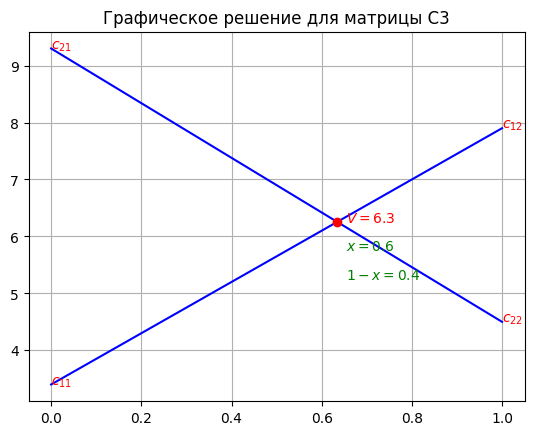

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def solve_task_2():
    print("=== Решение задачи 2: Матричная игра M × 2 ===")
    C3 = np.array([
        [1.7, 5.3],
        [3.4, 7.9],
        [8.6, 3.1],
        [2.8, 7.5],
        [9.3, 4.5]
    ])
    C3 = np.array([
        [3.4, 7.9],
        [9.3, 4.5],
    ])
    print("Матрица C3:")
    print(C3)

    lines = []

    for i in range(C3.shape[0]):
        c1i = C3[i][0]
        c2i = C3[i][1]
        plt.plot([0, 1], [c1i, c2i], color='blue')
        plt.text(1, c2i, f'$c_{{{i+1}2}}$', color='red')
        plt.text(0, c1i, f'$c_{{{i+1}1}}$', color='red')
        lines.append({'a': c2i - c1i, 'b': c1i})

    gre_intersection = []

    for i in range(len(lines) - 1):
        for j in range(i + 1, len(lines)):
            a1 = lines[i]['a']
            b1 = lines[i]['b']
            a2 = lines[j]['a']
            b2 = lines[j]['b']
            if a1 == a2:
                continue
            x = (b2 - b1) / (a1 - a2)
            y = a1 * x + b1
            if 0 < x < 1:
                if not gre_intersection or y > gre_intersection[1]:
                    gre_intersection = (x, y)

    if gre_intersection:
        x_inters, y_inters = gre_intersection
        plt.scatter(x_inters, y_inters, color='red', zorder=5)
        plt.text(x_inters + 0.02, y_inters, f'$V={round(y_inters, 1)}$', color='red')
        plt.text(x_inters + 0.02, y_inters - 0.5, f'$x={round(x_inters, 1)}$', color='green')
        plt.text(x_inters + 0.02, y_inters - 1.0, f'$1-x={round(1 - x_inters, 1)}$', color='green')

    plt.title("Графическое решение для матрицы C3")
    plt.grid()
    plt.show()


# Вызов функции для выполнения задачи
solve_task_2()
